# NAME: MD DANISH SAMIR
DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ SPARKS FOUNDATION

TASK-III EXPLORATORY DATA ANALYSIS- RETAIL

    *As a business manage, try to find out the weak areas where you can work to make more profit.
https://internship.thesparksfoundation.info/

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

# Load the dataset
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#lets check the details about of dataset
print("Shape of the dataset : ",data.shape)
data.info()

Shape of the dataset :  (9994, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
for _ in data.columns:
    print(_, len(data[_].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [6]:
#Null values in dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

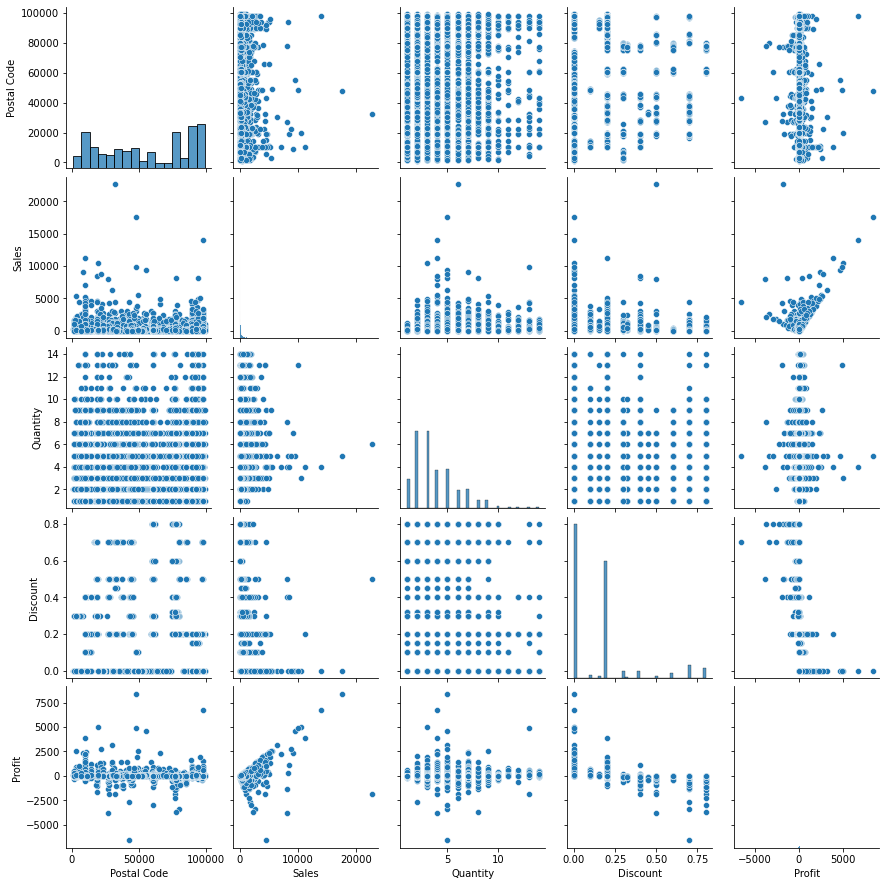

In [7]:
#Data visualisation using seaborn
sns.pairplot(data)

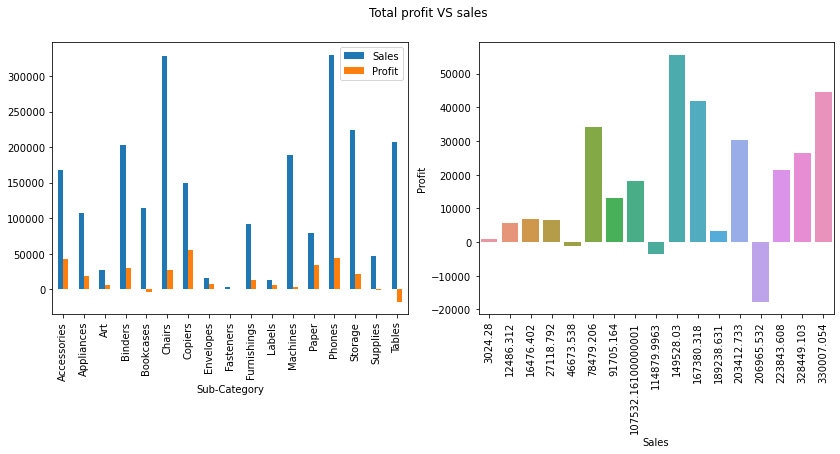

In [8]:
#Plotting the data of Total Profit and Sales using Matplotlib and seaborn
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total profit VS sales ")
sns.barplot(data=data.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
data.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

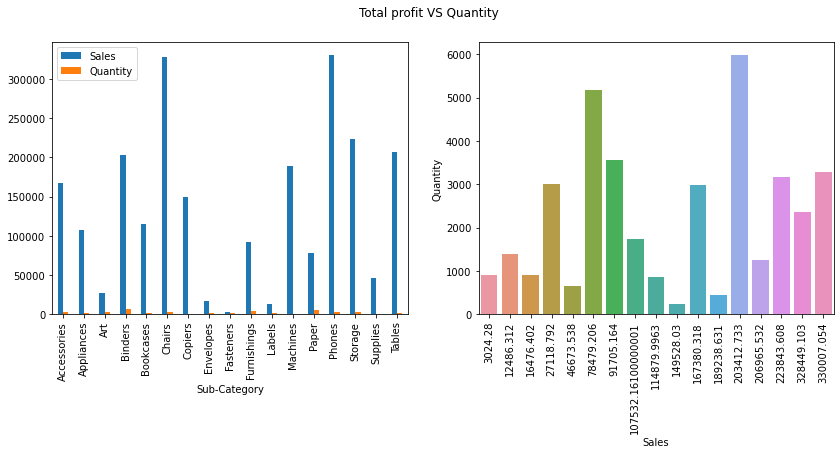

In [9]:
#Plotting the data of Total Profit and Quantity using Matplotlib and seaborn
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total profit VS Quantity ")
sns.barplot(data=data.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity',ax=axes[1])
data.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

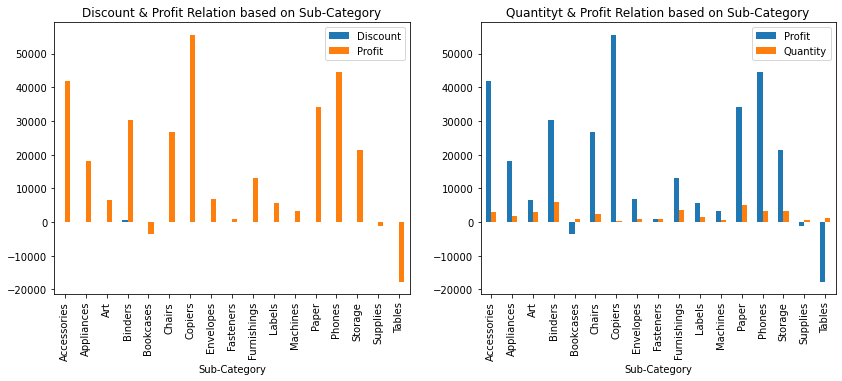

In [10]:
#Plotting the data of Discount & Profit Relation based on Sub-Category and Quantityt & Profit Relation based on Sub-Category
fig,axes = plt.subplots(1,2,figsize=(14,5))
data.groupby('Sub-Category')['Discount','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title("Discount & Profit Relation based on Sub-Category")
data.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1]).set_title("Quantityt & Profit Relation based on Sub-Category")
plt.xticks(rotation=90)
plt.show()

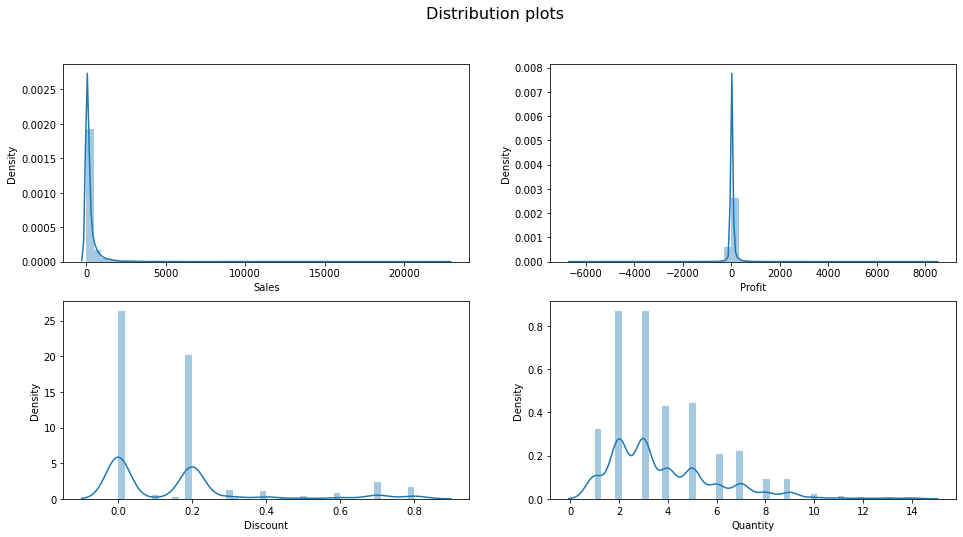

In [11]:
#Distribution Plots
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(data['Sales'],ax=axes[0,0])
sns.distplot(data['Profit'],ax=axes[0,1])
sns.distplot(data['Discount'],ax=axes[1,0])
sns.distplot(data['Quantity'],ax=axes[1,1])
plt.show()

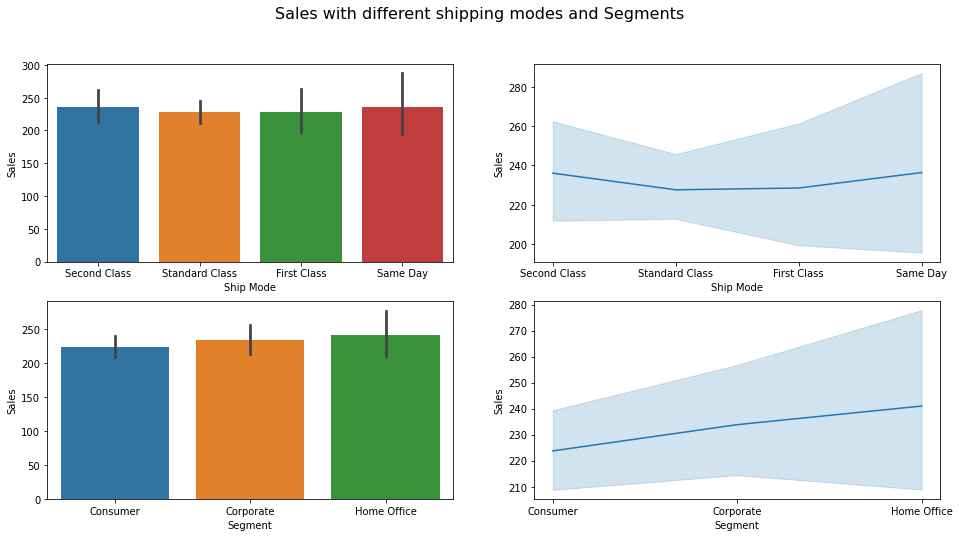

In [12]:
#plotting sales with different shipping modes and segments
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)
sns.barplot(data['Ship Mode'],data['Sales'],ax=axes[0,0])
sns.lineplot(data['Ship Mode'],data['Sales'],ax=axes[0,1])
sns.barplot(data['Segment'],data['Sales'],ax=axes[1,0])
sns.lineplot(data['Segment'],data['Sales'],ax=axes[1,1])
plt.show()

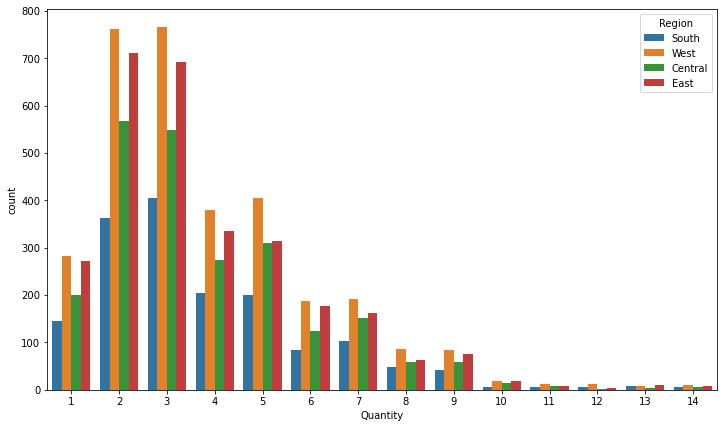

In [13]:
fig,ax= plt.subplots(1,1,figsize=(12,7))
sns.countplot(data['Quantity'],hue=data['Region'])
plt.show()

#Thanks You